#6. Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def kernel(x, xi, tau):
  return np.exp(-np.sum((x-xi)**2)/(2*tau**2))

def lwr(x, X, y, tau):
  weights = np.array([kernel(x, xi, tau) for xi in X])
  w = np.diag(weights)
  theta = np.linalg.inv(X.T @ w @ X) @ X.T @ w @ y
  return x@theta

In [5]:
np.random.seed(42)

x = np.linspace(0, np.pi*2, 100)
x_bias = np.c_[np.ones(x.shape), x]

x_test = np.linspace(0, 2*np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape),x_test]

tau = 0.4
y = np.sin(x) + 0.1* np.random.randn(100)
y_pred=[lwr(xi, x_bias, y, tau) for xi in x_test_bias]

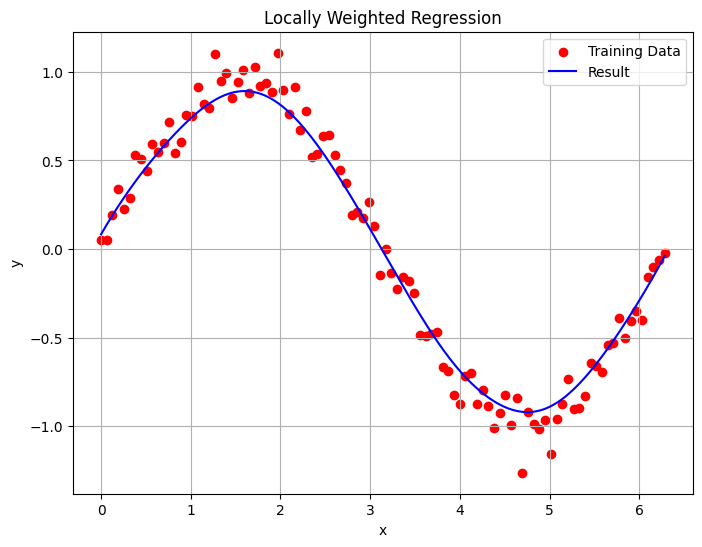

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x,y, color='red', label="Training Data")
plt.plot(x_test, y_pred, color="blue", label="Result")

plt.title("Locally Weighted Regression")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.grid(True)
plt.show()
